In [24]:
    import pandas as pd
    import sys
    sys.path.append('..')
    from tools import data_parser as dp
    from data_visualisation import TSNE_2D_analysis as tsne
    from tools import feature_selection as feat
    import seaborn as sns
    import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
abysis_berty = '../data/abYsis_bert_df.csv'
abysis_df = '../data/abYsis_data.csv'
abysis_berty_df = pd.read_csv(abysis_berty)
abysis_df = pd.read_csv(abysis_df)

In [4]:
abysis_berty_df.shape

(4399, 512)

In [5]:
abysis_df.shape

(5259, 5)

In [11]:
light,heavy,source,names = dp.data_extract_abY('../data/abYsis_data.csv')

In [14]:
len(light)

4399

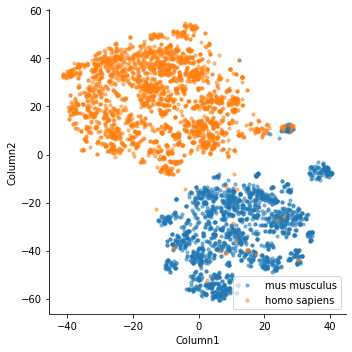

In [18]:
tsne.plot2d('../data/abYsis_bert_df.csv',source)

In [20]:
abysis_feat_72 = feat.feat_select(abysis_berty_df,source, 72)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U12'), dtype('<U12')) -> None

In [21]:
data72 = pd.read_csv('../data/combined_datasets_72.csv')

def select_columns(X):
    # Replace this list with the names of the columns you want to select
    selected_features = data72.columns
    X.columns = ['{}'.format(i) for i in range(len(X.columns))]
    X_new = X[selected_features]
    X_new.columns = ['{}'.format(i) for i in range(len(X_new.columns))]
    return X_new

abY_bert_reduced_df = select_columns(abysis_berty_df)

In [22]:
abY_bert_reduced_df

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,150.734760,-1.429909,-88.657120,-47.829390,-154.085770,17.219220,-3.618436,-11.119471,80.490654,93.510120,...,384.94672,53.054035,-11.763147,-9.972216,18.321579,-25.560791,-6.854883,-119.697495,0.398846,46.869390
1,212.380660,-41.452564,68.422630,27.771410,-130.201170,-29.938305,26.521590,35.617160,52.429520,-13.990732,...,220.36493,14.879402,-31.924635,4.472650,19.171612,-35.572582,81.915825,-101.625210,-30.992832,114.938220
2,254.164200,-118.831610,149.221120,-27.051546,-10.311674,-54.871193,53.080414,13.844803,52.011543,48.133300,...,187.61296,117.697800,5.677790,-54.326897,17.858932,-49.773820,118.371180,-47.839424,3.346790,55.376270
3,173.167800,-48.315350,92.455124,105.444534,-48.875900,79.170270,1.144156,-25.384361,73.841255,-32.665737,...,263.88270,164.422500,78.385510,-180.512770,-62.740580,-14.722496,4.480755,-168.107210,61.714380,185.749730
4,109.009575,-67.968480,66.418510,-46.441105,-28.688555,3.372197,-24.213064,-90.982480,31.498436,-2.943020,...,116.04585,-1.826634,-97.193695,-53.277664,-33.357040,-57.070656,14.247761,-54.213905,-55.562237,95.312680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,143.607420,-81.559830,32.871650,-91.955025,-228.294850,91.917020,-95.335320,78.959724,65.465230,118.718925,...,399.36224,10.122396,-17.592072,53.438477,38.914530,-29.263180,-37.851665,8.663022,-27.461903,130.789300
4395,144.681210,-103.723274,51.151367,-152.875640,-138.904630,119.548420,-39.008380,63.154360,74.929330,172.189000,...,347.73270,83.608430,-19.210241,16.746685,42.693220,-23.806911,-52.396767,-5.888241,-100.716530,101.362040
4396,46.733820,163.200880,-5.433272,156.995940,-126.367110,-5.031398,44.603620,-75.936905,-24.057276,11.263302,...,170.58540,-14.252799,-136.248660,8.110908,-248.088380,79.813290,-78.490440,-197.613240,190.705780,212.826520
4397,57.689224,-15.253461,-91.460370,91.483010,-82.676620,115.969086,-35.290375,-115.982610,136.715260,-15.046064,...,293.28607,-11.820562,-15.988316,-130.689100,-50.171696,-16.335094,-35.008884,-0.807268,-116.496440,-21.481022


In [25]:
def plot2d(data, source, dims=2, perpx=100):


    Array2d = data.to_numpy()

    X_embedded = TSNE(n_components=dims, learning_rate='auto',
                      init ='random', perplexity=perpx).fit_transform(Array2d)

    dataset = pd.DataFrame({'Column1': X_embedded[:, 0], 'Column2': X_embedded[:, 1]})

    dataset['source'] = source

    tsne_plot = sns.lmplot(x="Column1", y="Column2", data=dataset, fit_reg=False, hue='source', legend=False,
                           scatter_kws={"s": 10,'alpha': 0.5})
    plt.legend(loc='lower right')
    plt.show()

    return tsne_plot.figure.savefig("TSNE_plot_per50.png", bbox_inches='tight')

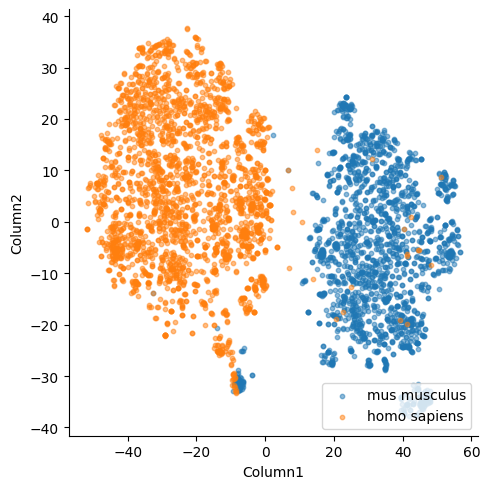

In [26]:
plot2d(abY_bert_reduced_df,source)

In [28]:
import ablang

SystemError: initialization of _internal failed without raising an exception

In [ ]:
heavy_ablang = ablang.pretrained("heavy")
heavy_ablang.freeze()

In [44]:
from tensorflow.python.keras.layers import Dense
from keras.layers import LSTM
from tensorflow.python.keras import Sequential
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np


def rnn_cv(X,y, num_epochs=100, batch_size=10):

    rand = 28

    X.columns = ['{}'.format(i) for i in range(len(X.columns))]
    y = pd.DataFrame(y)
    y = y.values.ravel()
    # split the data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand)

    # set up the subplots
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
    axs = axs.flatten()

    mae_scores = []
    r2_scores = []
    pearsonr_scores = []

    # set up the k-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for i, (train_index, val_index) in enumerate(kf.split(X_train)):

        print("TRAIN:", train_index, "VAL:", val_index)
        kX_train, kX_val = X_train.iloc[train_index], X_train.iloc[val_index]
        ky_train, ky_val = y_train[train_index], y_train[val_index]

        # create the RNN model
        kX_train = kX_train.values.reshape((kX_train.shape[0], kX_train.shape[1], 1))
        kX_val = kX_val.values.reshape((kX_val.shape[0], kX_val.shape[1], 1))
        ky_train = np.array(ky_train)
        ky_val = np.array(ky_val)
        model = Sequential()
        model.add(LSTM(64, input_shape=(kX_train.shape[1], kX_train.shape[2])))
        model.add(Dense(32))
        model.compile(loss='mean_absolute_error', optimizer='adam')

        # fit the model
        history = model.fit(kX_train, ky_train, epochs=num_epochs, batch_size=batch_size, verbose=2, validation_data=(kX_val, ky_val))

        # evaluate the model on the test set
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # y_test and predictions are arrays with shape (36, 1)
        y_test_reshaped = np.squeeze(y_test)
        predictions_reshaped = np.squeeze(predictions)

        # Calculate Pearson correlation coefficient
        pearson, _ = pearsonr(y_test_reshaped, predictions_reshaped)

        mae_scores.append(mae)
        r2_scores.append(r2)
        pearsonr_scores.append(pearson)

        # plot training and validation loss on the appropriate subplot
        axs[i].plot(history.history['loss'])
        axs[i].plot(history.history['val_loss'])
        axs[i].set_title(f'Fold {i+1} Loss')
        axs[i].set_ylabel('Loss')
        axs[i].set_xlabel('Epoch')
        axs[i].legend(['Train', 'Validation'], loc='upper right')

    # adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

    print('MAE: %.3f (%.3f)' % (np.mean(mae_scores), np.std(mae_scores)))
    print('R2: %.3f (%.3f)' % (np.mean(r2_scores), np.std(r2_scores)))
    print('Pearsonr: %.3f (%.3f)' % (np.mean(pearsonr_scores), np.std(pearsonr_scores)))

    return model

In [29]:
bert_data_72 = "../data/combined_datasets_72.csv"
df = pd.read_csv(bert_data_72)

light, heavy, temp = dp.data_extract('../data/combined_datasets.csv')

X = df
y = temp

TRAIN: [  0   1   2   3   4   5   6   7   8  10  11  13  14  17  20  21  22  23
  25  26  27  28  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  52  53  54  57  58  59  61  62  63  64  66  67  68
  69  70  71  72  73  74  75  77  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  97  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 127 129 130 131 132
 133 134 136 137 138 139 140 142 143 144 146 148 149 150 153 154 156 157
 158] VAL: [  9  12  15  16  18  19  24  29  30  31  51  55  56  60  65  76  78  94
  95  96  98 101 125 126 128 135 141 145 147 151 152 155]
Epoch 1/100
13/13 - 3s - loss: 71.7569 - val_loss: 70.1053
Epoch 2/100
13/13 - 0s - loss: 71.3540 - val_loss: 69.7082
Epoch 3/100
13/13 - 0s - loss: 70.9133 - val_loss: 69.2044
Epoch 4/100
13/13 - 0s - loss: 70.3131 - val_loss: 68.4994
Epoch 5/100
13/13 - 0s - loss: 69.4386 - val_loss: 67.4098
Epoch 6/100
13/13 - 0s - loss: 68.1343 - val_

2023-04-29 00:32:38 | WARNING | tensorflow | 6 out of the last 6 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001AC90E588B0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


ValueError: y_true and y_pred have different number of output (1!=32)

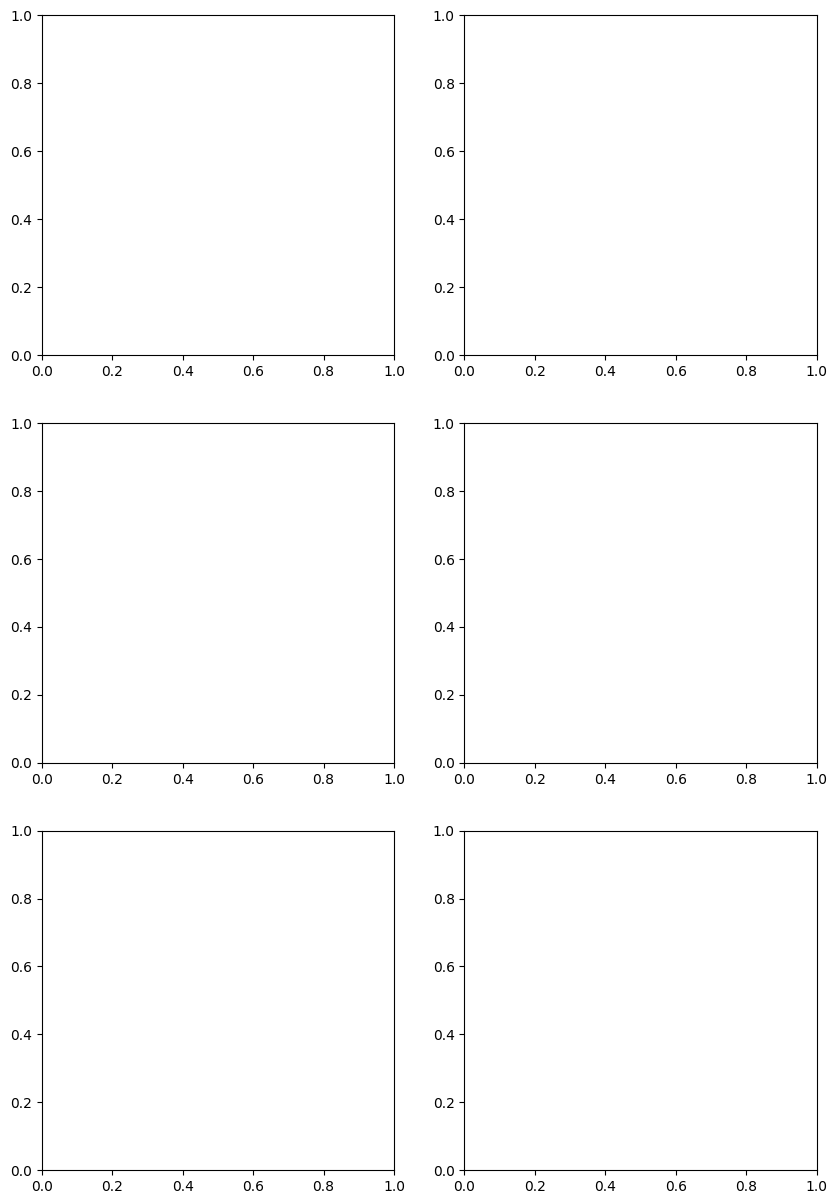

In [45]:
rnn_cv(X,y)

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [48]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)